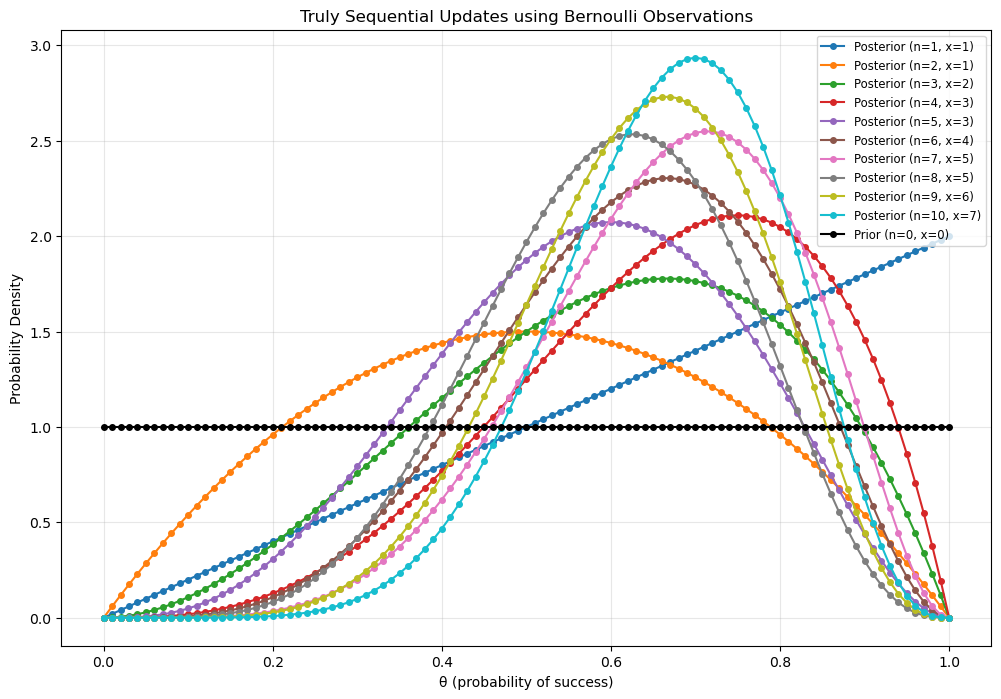

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the grid for θ values (probability of success)
theta_values = np.linspace(0, 1, 101)  # θ = 0, 0.01, ..., 1

# Update the posterior sequentially with a Beta prior
def sequential_update(data, alpha_prior, beta_prior):
    posteriors = []
    alpha = alpha_prior
    beta_param = beta_prior  # Renaming to avoid overwriting scipy.stats.beta
    
    for observation in data:
        # Update the posterior parameters based on the observation
        alpha += observation  # Increment alpha if success (1)
        beta_param += 1 - observation  # Increment beta if failure (0)
        
        # Compute the posterior PDF for the current parameters
        posterior = beta.pdf(theta_values, alpha, beta_param)
        posteriors.append((posterior, alpha - alpha_prior, beta_param - beta_prior))  # Track x and n for labeling
    
    return posteriors

# Simulate observations (1=success, 0=failure)
observations = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

# Define the initial Beta prior (e.g., Beta(1, 1) = uniform prior)
alpha_prior = 1  # Uniform prior
beta_prior = 1

# Compute the sequential posteriors
posteriors = sequential_update(observations, alpha_prior, beta_prior)

# Plot the sequential posteriors with markers
plt.figure(figsize=(12, 8))
for i, (posterior, x, n) in enumerate(posteriors):
    plt.plot(theta_values, posterior, label=f"Posterior (n={i+1}, x={x})", marker='o', linestyle='-', markersize=4)
    
# Add the initial prior
prior = beta.pdf(theta_values, alpha_prior, beta_prior)
plt.plot(theta_values, prior, label="Prior (n=0, x=0)", marker='o', linestyle='-', markersize=4, color='black')

plt.xlabel("θ (probability of success)")
plt.ylabel("Probability Density")
plt.title("Truly Sequential Updates using Bernoulli Observations")
plt.legend(loc="upper right", fontsize="small")
plt.grid(alpha=0.3)
plt.show()




